In [2]:
import sys
print(sys.executable)

/home/tomislav/mambaforge-pypy3/envs/houses_tf/bin/python


In [103]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [13]:
dataset_path = "../data/house-prices-advanced-regression-techniques/"
tr_df = pd.read_csv(os.path.join(dataset_path, "train.csv"))
test_df = pd.read_csv(os.path.join(dataset_path, "test.csv"))

In [14]:
tr_df.loc[tr_df["MasVnrArea"].isnull() & tr_df["MasVnrType"].isnull(), "MasVnrArea"] = 0.0
tr_df.dropna(subset=["Electrical"], inplace=True)
tr_df.drop(tr_df[tr_df["BsmtFinType1"].notnull() & tr_df["BsmtFinType2"].isnull()].index[0], inplace=True)
tr_df.loc[tr_df["LotFrontage"].isnull(), "LotFrontage"] = tr_df["LotFrontage"].mean()
tr_df.drop(columns="Id", inplace=True)


print(tr_df.shape)
print(test_df.shape)


(1458, 80)
(1459, 80)


In [82]:
print(len(tr_df))
val_ratio = 0.2
interval = len(tr_df) * val_ratio
interval = np.floor(interval).astype(np.int16)
print(interval)
print(interval*5)

splits = []
pool = np.array(range(len(tr_df)))
for i in range(int(1/val_ratio)):
    split = np.random.choice(pool, size=interval, replace=False)
    split = split.tolist()
    splits.append(split)
    print(i)
    pool = pool[np.isin(pool, split, invert=True)]
for i in range(len(splits)):
    print(len(splits[i]))

1458
291
1455
0
1
2
3
4
291
291
291
291
291


In [106]:
import tensorflow.keras.backend as K

def root_mean_squared_log_error(y_true, y_pred):
    msle = tf.keras.losses.MeanSquaredLogarithmicError()
    return K.sqrt(msle(y_true, y_pred))

In [107]:
for i in range(len(splits)):
    val_pool = splits[i]
    train_pool = []
    for j in range(len(splits)):
        if i == j:
            continue
        train_pool.append(splits[j])
    train_pool = np.hstack(train_pool).tolist()
    train_data = tr_df.iloc(axis=0)[train_pool]
    val_data = tr_df.iloc(axis=0)[val_pool]
    #print(val_pool)
    #print("val " + str(len(val_data)))
    #print(train_pool.shape)
    #print(train_pool.shape[0] + len(val_data))
    #print("train " + str(len(train_pool)) + " " + str(len(train_pool[0])))

    label = "SalePrice"
    train_data = tfdf.keras.pd_dataframe_to_tf_dataset(
        train_data, label=label, task = tfdf.keras.Task.REGRESSION)
    val_data = tfdf.keras.pd_dataframe_to_tf_dataset(
        val_data, label=label, task = tfdf.keras.Task.REGRESSION)
    #test_data = 
    
    model = tfdf.keras.RandomForestModel(hyperparameter_template="benchmark_rank1",
                                        task=tfdf.keras.Task.REGRESSION)
    model.compile(
        loss=[root_mean_squared_log_error],
        metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
    
    model.fit(x=train_data, verbose=0)

    inspector = model.make_inspector()
    inspector.evaluation()

    eval = model.evaluate(x=val_data, return_dict=True)
    for name, value in eval.items():
        print(f"{name}: {value:.4f}")
        
            


Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpj_gsl3d1 as temporary training directory


[INFO 23-09-11 20:33:21.3023 CEST kernel.cc:1243] Loading model from path /tmp/tmpj_gsl3d1/model/ with prefix 95013664af9a4403
[INFO 23-09-11 20:33:21.7257 CEST decision_forest.cc:660] Model loaded with 300 root(s), 110446 node(s), and 75 input feature(s).
[INFO 23-09-11 20:33:21.7257 CEST abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 23-09-11 20:33:21.7257 CEST kernel.cc:1075] Use fast generic engine


1/1 [==============================] - 0s 364ms/step - loss: 0.1186 - rmse: 22209.6230
loss: 0.1186
rmse: 22209.6230
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpwmx9eei7 as temporary training directory


[INFO 23-09-11 20:33:27.3534 CEST kernel.cc:1243] Loading model from path /tmp/tmpwmx9eei7/model/ with prefix 63b06bc620a54b52
[INFO 23-09-11 20:33:27.7783 CEST decision_forest.cc:660] Model loaded with 300 root(s), 110656 node(s), and 74 input feature(s).
[INFO 23-09-11 20:33:27.7784 CEST kernel.cc:1075] Use fast generic engine


1/1 [==============================] - 0s 336ms/step - loss: 0.1502 - rmse: 23451.7656
loss: 0.1502
rmse: 23451.7656
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmph19sfme0 as temporary training directory


[INFO 23-09-11 20:33:33.3672 CEST kernel.cc:1243] Loading model from path /tmp/tmph19sfme0/model/ with prefix a8bb4ee731a045f0
[INFO 23-09-11 20:33:33.7903 CEST decision_forest.cc:660] Model loaded with 300 root(s), 110576 node(s), and 74 input feature(s).
[INFO 23-09-11 20:33:33.7904 CEST abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 23-09-11 20:33:33.7904 CEST kernel.cc:1075] Use fast generic engine


1/1 [==============================] - 0s 293ms/step - loss: 0.1510 - rmse: 38553.2656
loss: 0.1510
rmse: 38553.2656
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpakqj72_5 as temporary training directory


[INFO 23-09-11 20:33:39.9915 CEST kernel.cc:1243] Loading model from path /tmp/tmpakqj72_5/model/ with prefix 6bb76c0729f14c8a
[INFO 23-09-11 20:33:40.3991 CEST decision_forest.cc:660] Model loaded with 300 root(s), 110530 node(s), and 74 input feature(s).
[INFO 23-09-11 20:33:40.3992 CEST kernel.cc:1075] Use fast generic engine


1/1 [==============================] - 0s 332ms/step - loss: 0.1389 - rmse: 29681.3281
loss: 0.1389
rmse: 29681.3281
Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpti4sl3ed as temporary training directory


[INFO 23-09-11 20:33:46.3186 CEST kernel.cc:1243] Loading model from path /tmp/tmpti4sl3ed/model/ with prefix a9a88c1045354191
[INFO 23-09-11 20:33:46.7393 CEST decision_forest.cc:660] Model loaded with 300 root(s), 110774 node(s), and 73 input feature(s).
[INFO 23-09-11 20:33:46.7393 CEST abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 23-09-11 20:33:46.7394 CEST kernel.cc:1075] Use fast generic engine


1/1 [==============================] - 0s 310ms/step - loss: 0.1334 - rmse: 27983.5391
loss: 0.1334
rmse: 27983.5391


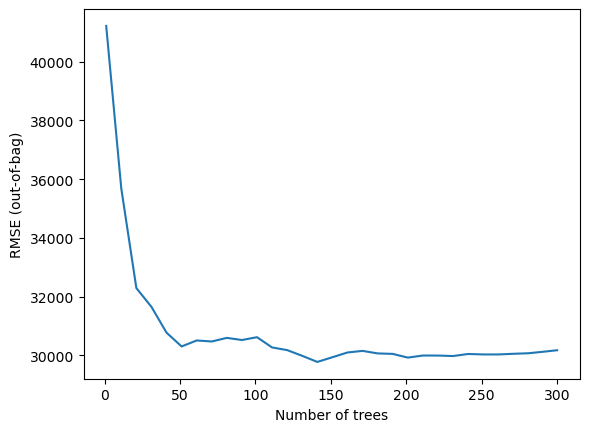

Evaluation(num_examples=1164, accuracy=None, loss=None, rmse=30175.327284251154, ndcg=None, aucs=None, auuc=None, qini=None)

In [93]:
logs = model.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

inspector = model.make_inspector()
inspector.evaluation()

In [89]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [15]:
label = "SalePrice"
tr_tf = tfdf.keras.pd_dataframe_to_tf_dataset(
    tr_df, label=label, task = tfdf.keras.Task.REGRESSION)

2023-09-11 18:25:17.007501: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-11 18:25:17.388777: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [125]:
nullseries = tr_df.isnull().sum()
print(nullseries[nullseries > 0])

Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


/tmp/ipykernel_460799/2965441146.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr_df[column], color='g', bins=100, hist_kws={'alpha': 0.4})
/home/tomislav/mambaforge-pypy3/envs/houses_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tomislav/mambaforge-pypy3/envs/houses_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

<Axes: xlabel='YearBuilt', ylabel='Density'>

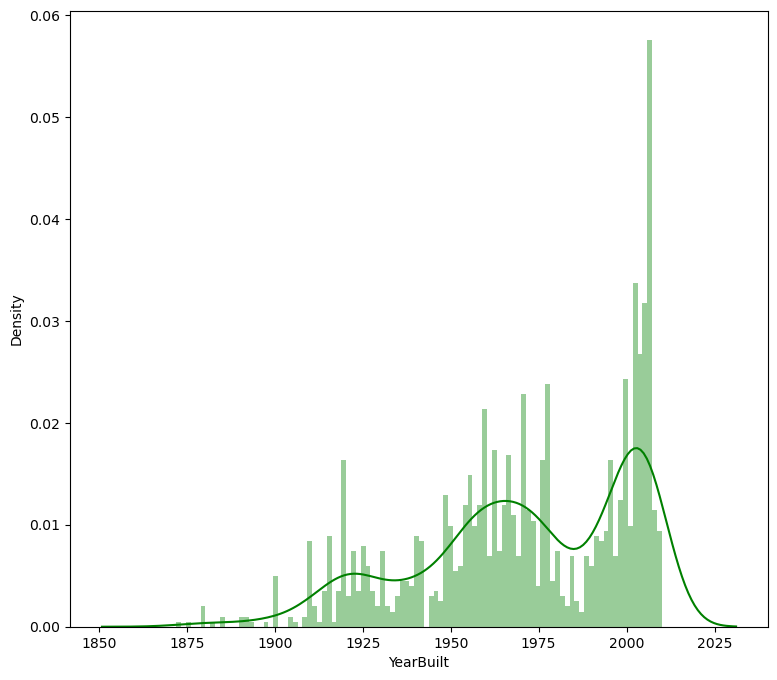

In [132]:
column = "YearBuilt"
print(tr_df[column].describe())
plt.figure(figsize=(9,8))
sns.distplot(tr_df[column], color='g', bins=100, hist_kws={'alpha': 0.4})


In [130]:
df_num = tr_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

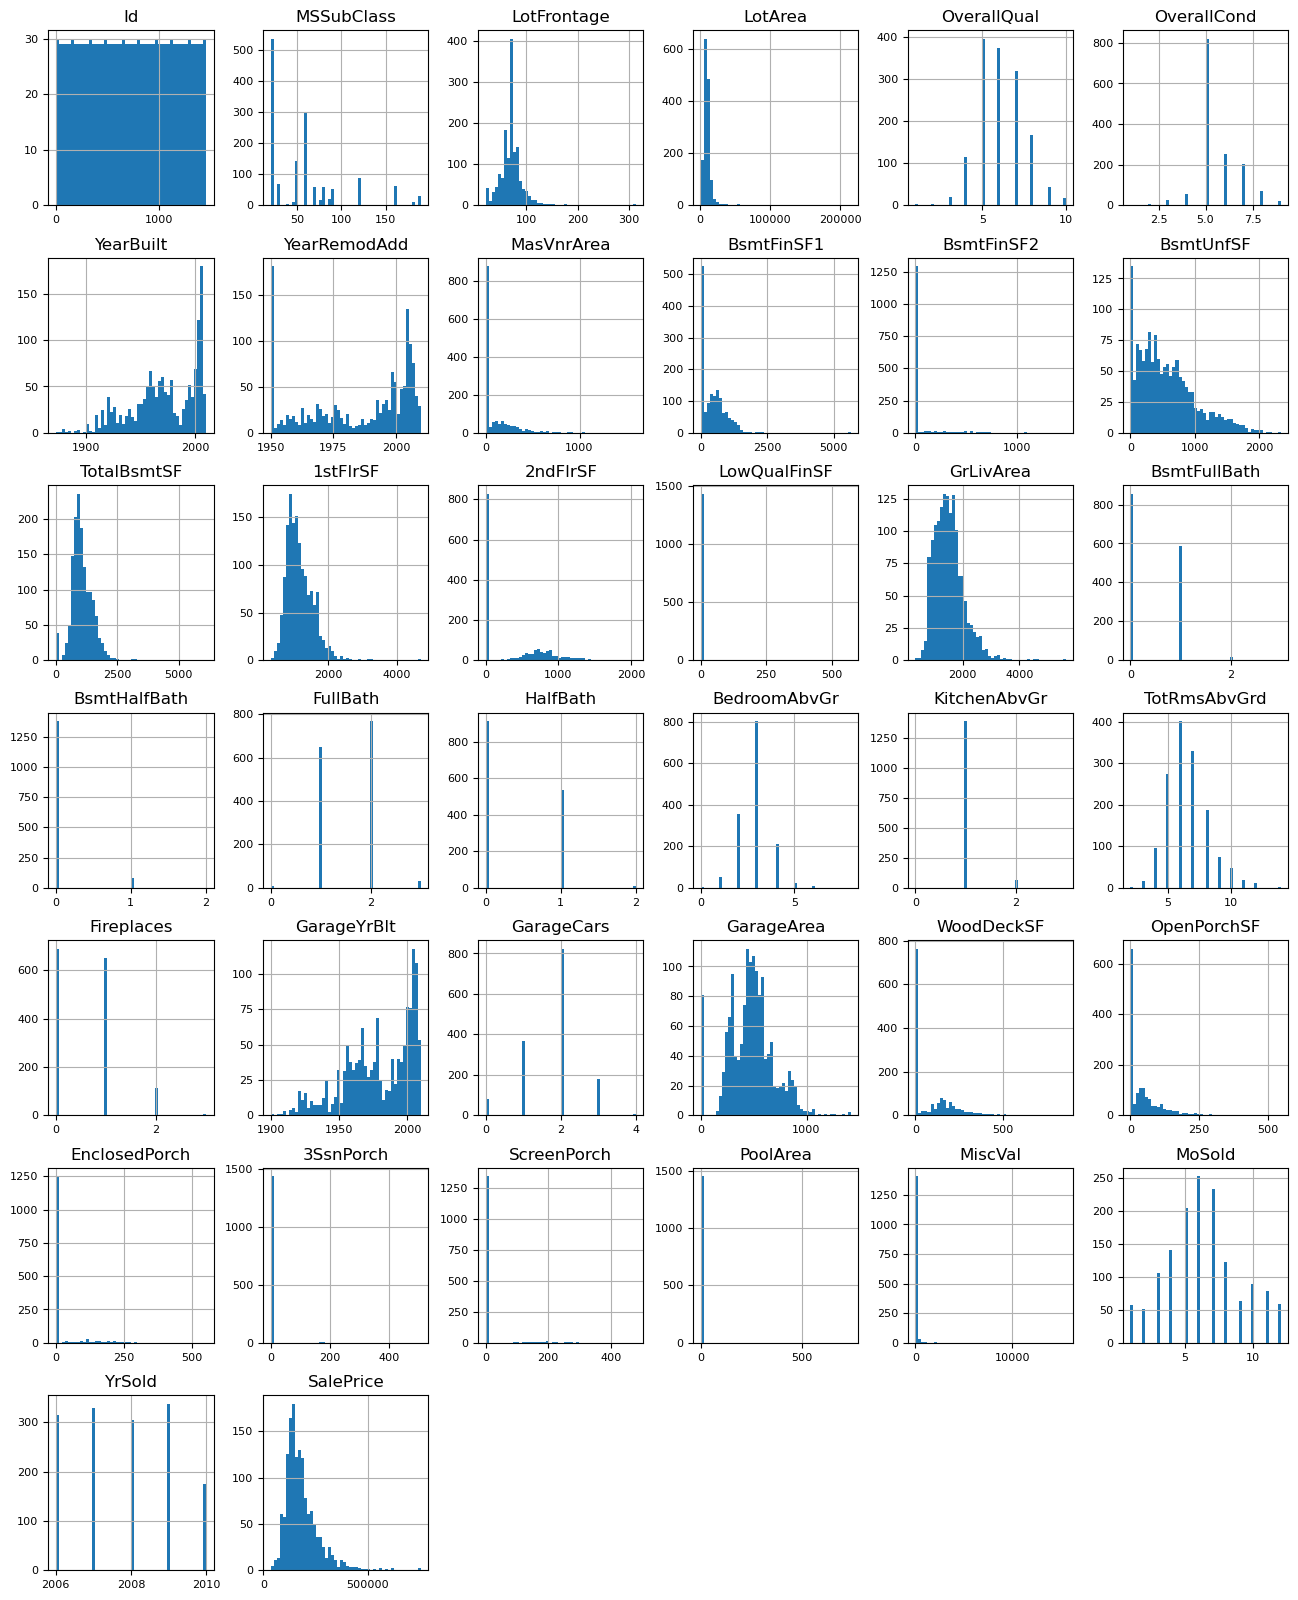

In [131]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)